In [232]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

**DATA PREPROCESSING**


In [233]:
dir = "PLD_3_Classes_256/Training"
x=[]
y=[]
for direct in os.listdir(dir):
    print("Loading dataset {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x.append(image)
        y.append(direct)
    
    

Loading dataset Early_Blight
Loading dataset Healthy
Loading dataset Late_Blight


In [234]:
dir_val = "PLD_3_Classes_256/Validation"
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset Early_Blight
Loading dataset Healthy
Loading dataset Late_Blight


**ONE HOT ENCODING**

In [235]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
int_labels = le.fit_transform(y)
encode_label = to_categorical(int_labels)

In [236]:
print(int_labels)

[0 0 0 ... 2 2 2]


In [237]:
print(encode_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [238]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
int_labels = le.fit_transform(y_val)
encode_label_val = to_categorical(int_labels)

In [239]:
x = np.array(x)

In [240]:
x_val = np.array(x_val)

In [242]:
from sklearn.utils import shuffle
x,encode_label = shuffle(x,encode_label)
x_val,encode_label_val = shuffle(x_val,encode_label_val)

**TRAIN TEST SPLIT**

In [243]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,encode_label,test_size=0.2)

In [251]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
encode_label_val = np.array([np.array(i) for i in encode_label_val])

In [252]:
print(Y_train)

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


**CNN MODEL**

In [253]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [254]:
ops.reset_default_graph()

In [255]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dropout (Dropout)           (None, 16384)             0

In [256]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [257]:
from keras.callbacks import ModelCheckpoint
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [258]:
history=model.fit(X_train,Y_train,validation_data=(x_val,encode_label_val),batch_size=32,epochs=10,callbacks=callbacks)

Epoch 1/10
81/82 [============================>.] - ETA: 0s - loss: 1.2824 - accuracy: 0.4846
Epoch 1: val_loss improved from inf to 1.12343, saving model to my_best_model.hdf5
82/82 [==============================] - 8s 96ms/step - loss: 1.2800 - accuracy: 0.4858 - val_loss: 1.1234 - val_accuracy: 0.3846
Epoch 2/10
81/82 [============================>.] - ETA: 0s - loss: 0.7465 - accuracy: 0.6759
Epoch 2: val_loss improved from 1.12343 to 1.06143, saving model to my_best_model.hdf5
82/82 [==============================] - 8s 97ms/step - loss: 0.7455 - accuracy: 0.6765 - val_loss: 1.0614 - val_accuracy: 0.4832
Epoch 3/10
81/82 [============================>.] - ETA: 0s - loss: 0.5861 - accuracy: 0.7515
Epoch 3: val_loss improved from 1.06143 to 0.96180, saving model to my_best_model.hdf5
82/82 [==============================] - 8s 97ms/step - loss: 0.5862 - accuracy: 0.7515 - val_loss: 0.9618 - val_accuracy: 0.5240
Epoch 4/10
81/82 [============================>.] - ETA: 0s - loss: 0.4

**SAVING THE MODEL**


In [259]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


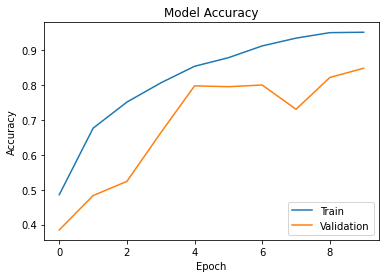

In [260]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

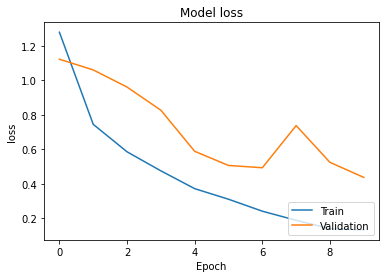

In [261]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

**TESTING WITH TEST INPUT IMAGE**

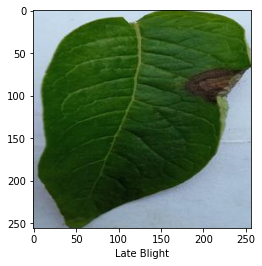

In [276]:
import matplotlib.image as mping
test_img_path = "test_image1.jpg"
img = mping.imread(test_img_path)
imgplot = plt.imshow(img)
plt.xlabel("Late Blight")
plt.show()


In [277]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)


In [278]:
print(test_arr)

[array([[[[0.92156863, 0.85490196, 0.78039216],
         [0.92156863, 0.85490196, 0.78039216],
         [0.92156863, 0.85490196, 0.78039216],
         ...,
         [0.94901961, 0.8745098 , 0.8       ],
         [0.92941176, 0.87058824, 0.79607843],
         [0.92941176, 0.87058824, 0.79607843]],

        [[0.90980392, 0.84313725, 0.76862745],
         [0.90980392, 0.84313725, 0.76862745],
         [0.91764706, 0.85098039, 0.77647059],
         ...,
         [0.49411765, 0.64705882, 0.5372549 ],
         [0.93333333, 0.8745098 , 0.8       ],
         [0.9254902 , 0.86666667, 0.79215686]],

        [[0.90588235, 0.83921569, 0.76470588],
         [0.90980392, 0.84313725, 0.76862745],
         [0.90588235, 0.84705882, 0.77254902],
         ...,
         [0.07843137, 0.42745098, 0.25490196],
         [0.19215686, 0.40784314, 0.29019608],
         [0.9254902 , 0.86666667, 0.78823529]],

        ...,

        [[0.63137255, 0.57254902, 0.50980392],
         [0.61568627, 0.55686275, 0.49411765

In [283]:
model.predict(test_arr) #From this we can conclude that the prediction shows the leaf has Late Blight disease!!

1/1 [==============================] - 0s 27ms/step


array([[5.1824725e-05, 1.4537071e-04, 9.9980277e-01]], dtype=float32)